In [15]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import house_sales_data as hsd
from sklearn.model_selection import train_test_split

In [ ]:
## Sacramento house price data; load

data = hsd.house_sales_data()
print(data.keys())

## Get the target (i.e., price) and two features
# price = ...
# area = ...
# beds = ...
price = data["price"]
area = data["area"]
beds = data["beds"]

In [ ]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            costs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= learning_rate * grad
    return theta, costs

In [12]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return X,y,min_X, max_X, min_y, max_y

In [30]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    return np.mean(np.square(y-y_hat))
    #I have used MSE

In [16]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# call gradient descent and fine-tune your learning rate
theta,costs = gradient_descent(X_train,y_train,1000,0.01)

Text(0, 0.5, 'Costs')

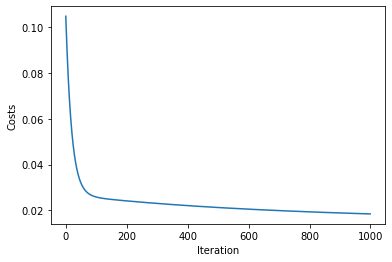

In [26]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Costs")

In [51]:
# print evaluation metric for test set while 
y_test_hat = X_test@theta
evaluation_metric(y_test,y_test_hat)

# changing max_iteration from 500 to 2000
def evaluation(min,max,step,learning_rate):
    evaluation = []
    for max_iteration in range(min,max,step):
        theta,costs = gradient_descent(X_train,y_train,max_iteration,learning_rate)
        y_test_hat = X_test@theta
        t = evaluation_metric(y_test,y_test_hat)
        evaluation.append(t)
    return(evaluation)

ev = evaluation(500,2001,500,0.1)

In [57]:
# Note the best value of evaluation metric you get
ev_GD = min(ev)
print('best value of evaluation metric is {}'.format(ev_GD))

best value of evaluation metric is 0.012660679871144692


In [61]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model

model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
ev_sklearn = evaluation_metric(y_test,y_hat)
print('My best solution is {}'.format(ev_GD))
print('Value given by sklearn library is {}'.format(ev_sklearn))

My best solution is 0.012660679871144692
Value given by sklearn library is 0.012602503305118876


In [ ]:
# Create linear regression object
model = linear_model.LinearRegression(fit_intercept=True, normalize=False)

In [62]:
# Train the model using the training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict on test set and print evaluation metric
y_hat = model.predict(X_test)
# How much does it differ by from 
y_hat = model.predict(X_test)
ev_sklearn = evaluation_metric(y_test,y_hat)
ev_diff = abs(ev_sklearn - ev_GD)
print('My best solution is {}'.format(ev_GD))
print('Value given by sklearn library is {}'.format(ev_sklearn))
print('The difference is {}'.format(ev_diff))

My best solution is 0.012660679871144692
Value given by sklearn library is 0.012602503305118876
The difference is 5.8176566025816556e-05
